In [1]:
#import necessary libraries
import csv
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot


from sklearn.metrics import confusion_matrix

In [2]:
#read the cleaned dataset for London
df = pd.read_csv('London_accidents_data_with_cluster.csv')    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106938 entries, 0 to 106937
Data columns (total 91 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Unnamed: 0                                   106938 non-null  int64  
 1   index                                        106938 non-null  int64  
 2   geometry                                     106938 non-null  object 
 3   index_right                                  106938 non-null  int64  
 4   NAME                                         106938 non-null  object 
 5   GSS_CODE                                     106938 non-null  object 
 6   HECTARES                                     106938 non-null  float64
 7   NONLD_AREA                                   106938 non-null  float64
 8   LB_GSS_CD                                    106938 non-null  object 
 9   BOROUGH                                      106938 non-nul

In [3]:
#copy a new dataframe for further model testing
df1=df.copy()

In [4]:
# Dropping unnecessary columns
df1.drop(['number_of_vehicles', 'number_of_casualties', 
                'date', 'special_conditions_at_site', 
                'lsoa_of_accident_location','converted_time'], 
               axis=1, inplace=True)

In [5]:
df1.columns

Index(['Unnamed: 0', 'index', 'geometry', 'index_right', 'NAME', 'GSS_CODE',
       'HECTARES', 'NONLD_AREA', 'LB_GSS_CD', 'BOROUGH', 'POLY_ID',
       'accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'day_of_week',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_year_x', 'accident_reference_x',
       'vehicle_reference_x', 'casualty_refe

In [6]:
#selecting predictors from the above features
df1 = df1[['accident_index','longitude', 'latitude','did_police_officer_attend_scene_of_accident' , 'age_of_driver' ,'vehicle_type', 'age_of_vehicle',
                             'engine_capacity_cc','day_of_week' , 'road_type', 'weather_conditions', 'journey_purpose_of_driver',
                             'sex_of_driver' ,'speed_limit','pedestrian_crossing_physical_facilities','junction_control','road_type','light_conditions','accident_severity','cluster']]

In [7]:
df1 = df1.set_index('accident_index')

In [8]:
df2 =df1.apply(lambda x : x.astype('category'))

In [9]:
df2 =df2.apply(lambda x: x.cat.codes)

In [10]:
df2.columns

Index(['longitude', 'latitude', 'did_police_officer_attend_scene_of_accident',
       'age_of_driver', 'vehicle_type', 'age_of_vehicle', 'engine_capacity_cc',
       'day_of_week', 'road_type', 'weather_conditions',
       'journey_purpose_of_driver', 'sex_of_driver', 'speed_limit',
       'pedestrian_crossing_physical_facilities', 'junction_control',
       'road_type', 'light_conditions', 'accident_severity', 'cluster'],
      dtype='object')

In [11]:
#selecting predictors from the above features
predictors = df2[['did_police_officer_attend_scene_of_accident' , 'age_of_driver' ,'vehicle_type', 'age_of_vehicle',
                             'engine_capacity_cc','day_of_week' , 'road_type', 'weather_conditions', 'journey_purpose_of_driver',
                             'sex_of_driver' ,'speed_limit','pedestrian_crossing_physical_facilities','junction_control','road_type','light_conditions','cluster']]

In [12]:
#selecting X and y parameters
X= predictors
y=df2['accident_severity']

In [13]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                              df2['accident_severity'],test_size=0.30, random_state=99)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74856, 18)
(32082, 18)
(74856,)
(32082,)


In [15]:
#imbalanced dataset
df2['accident_severity'].value_counts()

2    92497
1    13950
0      491
Name: accident_severity, dtype: int64

# Imbalanced Dataset

## Random Forest 

In [16]:
#define the random forest model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model on the train data
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
#confusion matrix
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 85.17
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       173
           1   0.141361  0.019448  0.034192      4165
           2   0.864940  0.981942  0.919735     27744

    accuracy                       0.851693     32082
   macro avg   0.335434  0.333797  0.317975     32082
weighted avg   0.766338  0.851693  0.799811     32082



Predicted,0,1,2,All
Actual,,,,
0,0,2,171,173
1,1,81,4083,4165
2,11,490,27243,27744
All,12,573,31497,32082


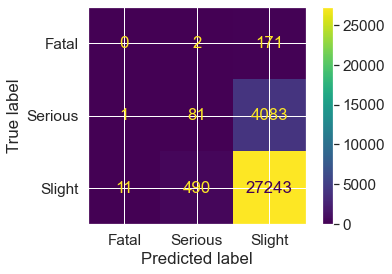

In [17]:
from sklearn.metrics import plot_confusion_matrix
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(random_forest,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

## Logistic Regression

In [20]:
#define the logistic regression model
lr = LogisticRegression()
# Fit the model on the training data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)

Accuracy 86.48
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       173
           1   0.000000  0.000000  0.000000      4165
           2   0.864784  1.000000  0.927490     27744

    accuracy                       0.864784     32082
   macro avg   0.288261  0.333333  0.309163     32082
weighted avg   0.747851  0.864784  0.802078     32082



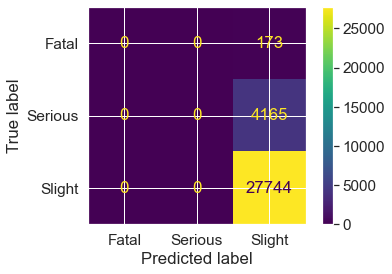

In [21]:
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(lr,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

## K Nearest Neigbors

In [22]:
KNeighbors_classifier = KNeighborsClassifier()                       
KNeighbors=KNeighbors_classifier.fit(X_train,y_train)                               
kn_preds = KNeighbors.predict(X_test)

test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       173
           1       0.14      0.03      0.04      4165
           2       0.87      0.98      0.92     27744

    accuracy                           0.85     32082
   macro avg       0.34      0.33      0.32     32082
weighted avg       0.77      0.85      0.80     32082

Accuracy of KNeighbors Classifier: 0.8479209525590674


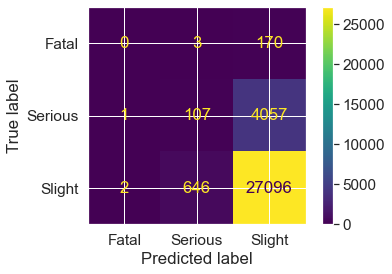

In [23]:
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(KNeighbors_classifier,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

# SMOTE Oversampling Techniques

In [25]:
sm = SMOTE()

X=np.array(X)

X, y = sm.fit_resample(X, y.ravel())

In [26]:
# Oversampling
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)
## train test split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=0.3,random_state=42)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train_over, y_train_over, test_size = 0.3, random_state = 42)

In [27]:
#check the oversampled result
pd.Series(y).value_counts()

2    92497
1    92497
0    92497
dtype: int64

In [28]:
X_train_over

array([[ 0, 44,  2, ...,  0,  4, 31],
       [ 0, 11,  2, ...,  3,  0,  4],
       [ 0, 37,  2, ...,  3,  1, 43],
       ...,
       [ 0, 37,  2, ...,  3,  4, 19],
       [ 0, 22,  2, ...,  0,  1,  0],
       [ 0, 51,  3, ...,  3,  4, 44]], dtype=int16)

## Random Forest after SMOTE

In [29]:
#define the model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model
random_forest.fit(X_train_over,y_train_over)
Y_pred = random_forest.predict(X_test_over)
random_forest.score(X_test_over, y_test_over)
acc_random_forest1 = round(random_forest.score(X_test_over, y_test_over) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test_over, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 88.51
              precision    recall  f1-score   support

           0   0.974485  0.994919  0.984596     27946
           1   0.831194  0.842064  0.836593     27834
           2   0.846218  0.816951  0.831327     27468

    accuracy                       0.885090     83248
   macro avg   0.883965  0.884644  0.884172     83248
weighted avg   0.884253  0.885090  0.884539     83248



Predicted,0,1,2,All
Actual,,,,
0,27804,77,65,27946
1,383,23438,4013,27834
2,345,4683,22440,27468
All,28532,28198,26518,83248


No handles with labels found to put in legend.


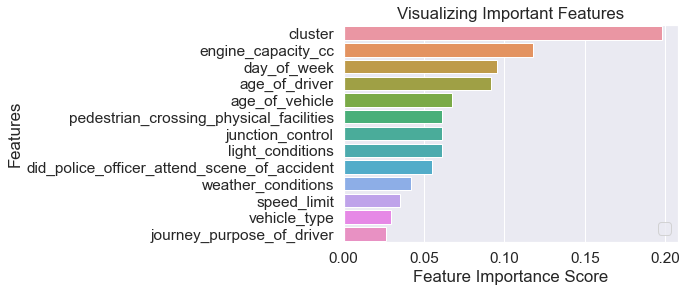

In [30]:
feature_imp = pd.Series(random_forest.feature_importances_,index=predictors.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=13
sns.barplot(x=feature_imp[:13], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Logistic Regression after SMOTE

In [32]:
#define the model
lr = LogisticRegression()
# Fit the model on the training data.
lr.fit(X_train_over, y_train_over)
y_pred = lr.predict(X_test_over)
sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test_over)*100,2))
print(sk_report)
pd.crosstab(y_test_over, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 43.58
              precision    recall  f1-score   support

           0   0.459208  0.456201  0.457700     27946
           1   0.389376  0.376841  0.383006     27834
           2   0.456720  0.474661  0.465518     27468

    accuracy                       0.435758     83248
   macro avg   0.435101  0.435901  0.435408     83248
weighted avg   0.435039  0.435758  0.435306     83248



Predicted,0,1,2,All
Actual,,,,
0,12749,8420,6777,27946
1,8613,10489,8732,27834
2,6401,8029,13038,27468
All,27763,26938,28547,83248


In [33]:
KNeighbors_classifier = KNeighborsClassifier()   
KNeighbors=KNeighbors_classifier.fit(X_train_over,y_train_over)                     
kn_preds = KNeighbors.predict(X_test_over)
test_report_kn = classification_report(y_test_over, kn_preds)
# print the performace measures
print(test_report_kn)

print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test_over, kn_preds))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27946
           1       0.71      0.92      0.80     27834
           2       0.91      0.55      0.68     27468

    accuracy                           0.82     83248
   macro avg       0.84      0.82      0.81     83248
weighted avg       0.84      0.82      0.81     83248

Accuracy of KNeighbors Classifier: 0.8218816067653277
